<a href="https://colab.research.google.com/github/AnaClaraAlmeida/mvp_movies/blob/main/MPV_AnaClara_4052025000825.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Letterbox

**Nome:** Ana Clara Paiva de Almeida

**Matrícula:** 4052025000825

**Dataset:** [Letterbox Dataset - Github](https://github.com/AnaClaraAlmeida/mvp_movies/blob/main/Letterbox%20Movie.csv)

[Letterbox Dataset - kaggle](https://www.kaggle.com/datasets/sahilislam007/letterbox-movie-classification-dataset)


# Descrição do Problema

O conjunto de dados de classificação de filmes Letterbox reune informações detalhadas sobre 10.002 filmes de vários gêneros, épocas e línguas. Os dados foram retirados de uma plataforma de avaliação de filmes, com inspiração no Letterboxd.O objetivo principal é antecipar o quão famoso um filme é, usando medidas de interação como a quantidade de marcações de "gostei", inclusões em listas, o número de vezes que foi visto e a quantidade de telespectadores etc. Isso será feito considerando características como o gênero, a duração, o idioma, um resumo do enredo, o estúdio e outras informações.

## Hipóteses do Problema

As hipóteses que tracei são as seguintes:

- Filmes do gênero Drama são os que mais engajam os usuários em termos de curtidas.

- Filmes com duração de 1h30 a 2h são melhores rankeados (Highest★★★★★)

- Grandes Estúdios priorizam filmes de língua inglesa.

## Tipo de Problema

Este é um problema de análise exploratória de dados. O objetivo é investigar padrões de popularidade de filmes com base em variáveis como gênero, idioma e duração, buscando validar hipóteses sobre o comportamento dos usuários da plataforma.

## Seleção de Dados

O dataset Letterbox é um conjunto de dados amplamente disponível e publicado na plataforma do Kaggle. Não é necessária uma etapa de seleção de dados externa, pois o dataset já está curado e pronto para uso.

## Atributos do Dataset

O dataset Letterbox Movie Classification contém 10.002 registros, cada um representando um filme e possui os seguintes atributos:

- Film_title: O título do filme.
- Director: O(s) diretor(es) principais do filme.
- Average_rating: A nota média atribuída pelo usuários ao filme (escala de 1 a 5).
- Genres: lista de gêneros do filme.
- Runtime: tempo de duração do filme em minutos.
- Original_language: Idioma original do filme.
- Description: sinopse do filme.
- Studios: Lista de estúdios de produção.
- Watches: Número total de vezes que o filme foi assistido por usuários.
- List_appearances: Número de vezes que o filme apareceu em listas criadas por usuários.
- Likes: Número total de curtidas que o filme recebeu dos usuários.
- Fans: Número de usuários que marcaram o filme como um de seus favoritos.
- Lowest★: Quantidade de avaliações com 1 estrela (baixa).
- Medium★★★: Quantidade de avaliações com 3 estrelas (mediana).
- Highest★★★★★: Quantidade de avaliações com 5 estrelas (alta).
- Total_ratings: Soma total de todas as avaliações (de 1 a 5 estrelas) recebidas pelo filme.
- is_drama: indica se o filme pertence ou não ao gênero Drama.



# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset Letterbox.

In [173]:
#importações
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [174]:
# carregamento do dataset
url_dados = 'https://raw.githubusercontent.com/AnaClaraAlmeida/mvp_movies/main/Letterbox%20Movie.csv'
df = pd.read_csv(url_dados)

In [175]:
# primeiras linhas
df.head()

,Unnamed: 0,Film_title,Director,Average_rating,Genres,Runtime,Original_language,Description,Studios,Watches,List_appearances,Likes,Fans,Lowest★,Medium★★★,Highest★★★★★,Total_ratings
0,0,The Fan,Eckhart Schmidt,3.57,"['Horror', 'Drama']",92.0,German,The hero-worship that Simone has for a pop sin...,['Barbara Moorse Workshop'],12841,11032,3763,79,129,1660,714,9042
1,1,Mad Max: Fury Road,George Miller,4.18,"['Adventure', 'Science Fiction', 'Action']",121.0,English,An apocalyptic story set in the furthest reach...,"['Warner Bros. Pictures', 'Village Roadshow Pi...",2488721,331681,927538,38000,12530,158356,511140,1682389
2,2,Suspiria,Dario Argento,3.93,['Horror'],99.0,English,An American newcomer to a prestigious German b...,['Seda Spettacoli'],618171,220094,219548,13000,2814,53427,88628,443757
3,3,Lost in Translation,Sofia Coppola,3.79,"['Drama', 'Comedy', 'Romance']",102.0,English,"Two lost souls visiting Tokyo -- the young, ne...","['American Zoetrope', 'Elemental Films']",1596190,254180,493248,38000,15167,155110,193717,1076949
4,4,Akira,Katsuhiro Otomo,4.28,"['Animation', 'Action', 'Science Fiction']",124.0,Japanese,A secret military project endangers Neo-Tokyo ...,"['MBS', 'Sumitomo Corporation', 'TOHO', 'Studi...",873068,175586,341567,21000,1822,40850,196532,600721


# Análise de Dados

Nesta etapa de Análise de Dados Exploratória (EDA) sobre o dataset do Letterbox, visamos entender a distribuição, as relações e as características das variáveis, o que é crucial para as etapas subsequentes de pré-processamento e modelagem.

## Total e Tipo das Instâncias

O dataset Letterbox possui 10.000 instâncias (observações) com 17 colunas. Cada uma representa um filme com infomações sobre título, diretorr, genero, idioma original, avaliações, visulizações etc.

Portanto, inclui tanto características numéricas (int, float) como curtidas, visualizações, duração, listas e fãs, quanto os atributos categóricos como idioma, estúdio, gênero. Com a possibilidade de classificação dos mais bem avaliados aos piores, 'Lowest★', 'Medium★★★', 'Highest★★★★★'.

In [176]:
print(f"Total de instâncias: {len(df)}")
print("\nTipos de dados por coluna:")
print(df.info())

Total de instâncias: 10000

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         10000 non-null  int64  
 1   Film_title         10000 non-null  object 
 2   Director           10000 non-null  object 
 3   Average_rating     10000 non-null  float64
 4   Genres             10000 non-null  object 
 5   Runtime            10000 non-null  float64
 6   Original_language  10000 non-null  object 
 7   Description        10000 non-null  object 
 8   Studios            10000 non-null  object 
 9   Watches            10000 non-null  int64  
 10  List_appearances   10000 non-null  int64  
 11  Likes              10000 non-null  int64  
 12  Fans               10000 non-null  int64  
 13  Lowest★            10000 non-null  int64  
 14  Medium★★★          10000 non-null  int64  
 15  Highest★★★★★    

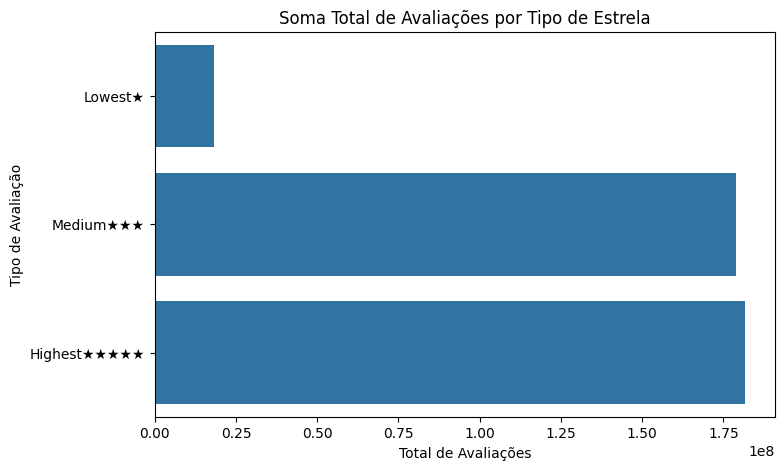

In [177]:
ratings_sum = df[['Lowest★', 'Medium★★★', 'Highest★★★★★']].sum().sort_values()

plt.figure(figsize=(8, 5))
sns.barplot(x=ratings_sum.values, y=ratings_sum.index)
plt.title("Soma Total de Avaliações por Tipo de Estrela")
plt.xlabel("Total de Avaliações")
plt.ylabel("Tipo de Avaliação")
plt.show()


O gráfico mostra a soma total de cada tipo de avaliação presente no dataset. As notas altas representam a maior parte das avaliações, seguidas pelas notas mais médoas. As avaliações mínimas têm a menor frequência, indicando que a maioria dos usuários tende a avaliar os filmes com notas medianas ou altas.

## Estatísticas Descritivas

Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis.

In [178]:
print(df.columns)

Index(['Unnamed: 0', 'Film_title', 'Director', 'Average_rating', 'Genres',
       'Runtime', 'Original_language', 'Description', 'Studios', 'Watches',
       'List_appearances', 'Likes', 'Fans', 'Lowest★', 'Medium★★★',
       'Highest★★★★★', 'Total_ratings'],
      dtype='object')


Verificando os dados abaixo temos que a base conta com 10.000 observações para todas as colunas numéricas, sem valores ausentes.

O average_rating (nota média dos filmes) varia de 1.08 a 4.71, com uma média de 3.26. Isso indica que, em geral, os filmes recebem avaliações medianas.

O runtime (duração dos filmes) possui grande variação, indo de 2 até 907 minutos. Ambos um valor outliers 2 min e quase 15 horas, já que a média é 103 minutos.

Watches, Likes, List_appearances e Fans têm distribuição bastante assimétrica com valores máximos extremamente altos, indicando a presença de filmes com altíssima popularidade, tambem outliers.

A mediana de Likes (3.394) e de Fans (24) mostra que a maioria dos filmes têm engajamentos menores, enquanto alguns poucos acumulam milhares.

 -----> Sobre as avaliações por tipo de estrela: Highest concentra a maior média de 18.171,58 avaliações por filme e o medium também aparece bastante com média de 17.887,07 e o lowest tem média muito menor (5.617,49), sugerindo tendência de avaliações mais positivas na plataforma e o gráfico anterior.

Por fim, a variável Total_ratings confirma essa concentração, com média de 106 mil avaliações por filme e desvio padrão alto, indicando alta variabilidade entre os títulos.

In [179]:
# estatísticas descritivas básicas do dataset
df.describe()

,Unnamed: 0,Average_rating,Runtime,Watches,List_appearances,Likes,Fans,Lowest★,Medium★★★,Highest★★★★★,Total_ratings
count,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04
mean,4999.778800,3.268535,103.169352,1.703148e+05,26868.798600,4.373479e+04,1652.549700,1837.319600,17887.078300,1.817158e+04,1.063923e+05
std,2887.257342,0.525744,38.070735,4.585329e+05,56751.328696,1.515314e+05,9368.258118,5617.492419,43713.123082,8.323460e+04,2.947343e+05
min,0.000000,1.080000,2.000000,2.000000e+00,33.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,2499.750000,2.950000,89.000000,2.979750e+03,1674.000000,4.570000e+02,2.000000,35.000000,422.750000,6.000000e+01,1.895000e+03
50%,4999.500000,3.268535,99.000000,1.842500e+04,6503.000000,3.394000e+03,24.000000,181.000000,2422.500000,5.720000e+02,1.182300e+04
75%,7500.250000,3.620000,113.000000,1.083580e+05,23908.250000,2.011225e+04,283.000000,1083.250000,12727.000000,4.583250e+03,6.749875e+04
max,10001.000000,4.710000,907.000000,5.195503e+06,803670.000000,2.730813e+06,326000.000000,176637.000000,629879.000000,2.010363e+06,4.091037e+06


### Média

A média é uma medida de tendência central que representa o valor típico ou o ponto de equilíbrio de um conjunto de dados. É calculada somando-se todos os valores e dividindo-se pelo número total de observações. É sensível a valores extremos (outliers).



In [180]:
# média dos atributos numéricos do dataset
df.describe().loc['mean']

,mean
Unnamed: 0,4999.778800
Average_rating,3.268535
Runtime,103.169352
Watches,170314.823600
List_appearances,26868.798600
Likes,43734.786500
Fans,1652.549700
Lowest★,1837.319600
Medium★★★,17887.078300
Highest★★★★★,18171.582600


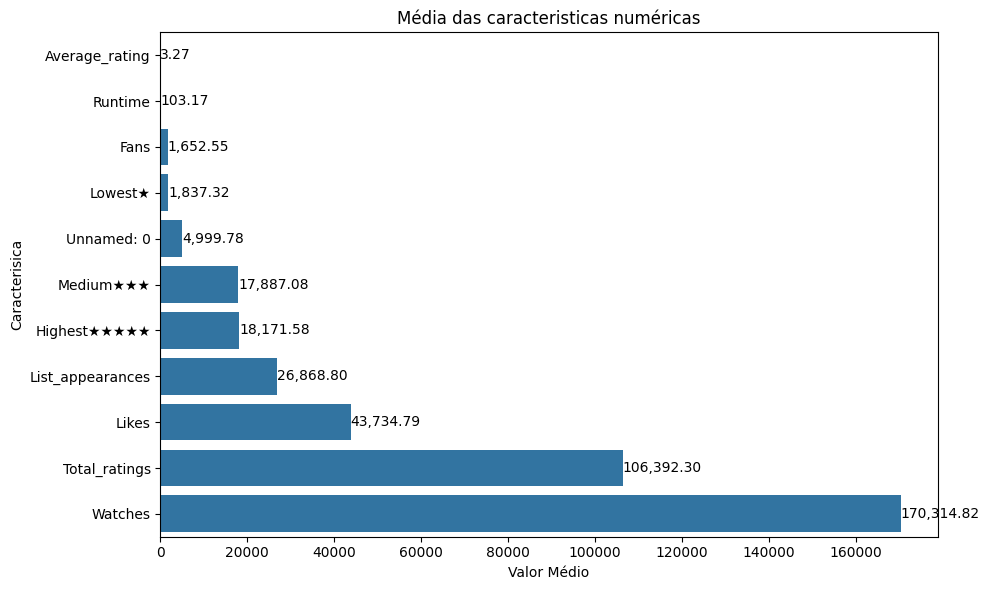

In [181]:
means = df.describe().loc['mean'].sort_values()
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=means.values, y=means.index)
for i, value in enumerate(means.values):
    ax.text(value, i, f'{value:,.2f}', va='center')
plt.title('Média das caracteristicas numéricas')
plt.xlabel('Valor Médio')
plt.ylabel('Caracterisica')
plt.tight_layout()
plt.show()

### Desvio Padrão

Ao observarmos o desvio padrão vemos que a quantidade de visualizações (Watches) apresenta a maior variação, cerca de 458 mil, seguida pelas avaliações totais (Total_ratings) com 294 mil e pelas curtidas (Likes) com 151 mil, o que mostra que alguns filmes se destacam muito mais que outros.

As avaliações máximas também variam bastante, com um desvio de 83 mil.

Por outro lado, a nota média (Average_rating), com 0.52, e o tempo de duração (Runtime), com 38, têm variações menores, indicando uma distribuição mais uniforme. A pequena variação na nota média, por exemplo, sugere que as avaliações dos filmes são relativamente parecidas.


>  O desvio padrão é uma medida de dispersão que quantifica a quantidade de variação ou dispersão de um conjunto de valores. Um desvio padrão baixo indica que os pontos de dados tendem a estar próximos da média do conjunto, enquanto um desvio padrão alto indica que os pontos de dados estão espalhados por uma faixa maior de valores. Ele é a raiz quadrada da variância.

In [182]:
# desvio padrão dos atributos numéricos do dataset
df.describe().loc['std']

,std
Unnamed: 0,2887.257342
Average_rating,0.525744
Runtime,38.070735
Watches,458532.917473
List_appearances,56751.328696
Likes,151531.431287
Fans,9368.258118
Lowest★,5617.492419
Medium★★★,43713.123082
Highest★★★★★,83234.601144


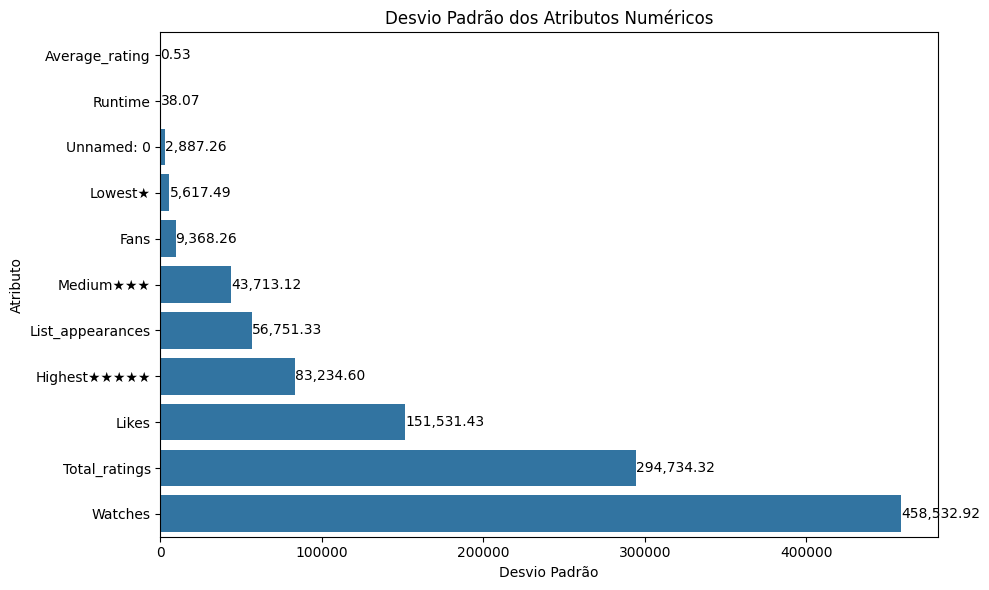

In [183]:
stds = df.describe().loc['std'].sort_values()
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=stds.values, y=stds.index)
for i, value in enumerate(stds.values):
    ax.text(value, i, f'{value:,.2f}', va='center')
plt.title('Desvio Padrão dos Atributos Numéricos')
plt.xlabel('Desvio Padrão')
plt.ylabel('Atributo')
plt.tight_layout()
plt.show()

# Pré-Processamento de Dados

## Padronização dos Gêneros (pra hipótese 1)

Verificando as primeiras linhas podemos ver que as colunas Genres e Studios estavam em um formato que pareciam listas, mas na verdade eram apenas strings com colchetes e aspas, ou seja, não estavam prontas pra análise. Como uma das minhas hipóteses depende diretamente do gênero do filme, precise então transformar a coluna Genres, primeiro, limpei os colchetes e aspas desnecessários, depois separei os gêneros e usei o explode pra criar uma linha nova para cada combinação de filme e gênero. Assim, se um mesmo filme tiver mais de um gênero (como “drama” e “romance”), ele vai aparecer em duas linhas, uma pra cada. Também deixei tudo em minúsculas e sem espaços extras, pra evitar inconsistências na hora de agrupar ou filtrar depois.

In [184]:
df_exploded = df.copy()
df_exploded['Genres'] = df_exploded['Genres'].astype(str).str.replace(r"[\[\]']", '', regex=True)
df_exploded['Genres'] = df_exploded['Genres'].str.split(',')
df_exploded = df_exploded.explode('Genres')
df_exploded['Genres'] = df_exploded['Genres'].str.strip().str.lower()

In [185]:
tabela_generos = df_exploded['Genres'].value_counts().reset_index()
tabela_generos.columns = ['Gênero', 'Quantidade']
tabela_generos.sort_values('Gênero', inplace=True)
display(tabela_generos)

,Gênero,Quantidade
3,action,2074
6,adventure,1448
27,and swordplay,1
12,animation,689
28,captivating vision and shakespearean drama,1
1,comedy,2932
5,crime,1523
14,documentary,430
0,drama,4416
23,epic adventure and breathtaking battles,1


Como vemos acima, temos alguns dados inconsistentes que precisamos ajustar pra contarem corretamente, então (Aproveitei e já coloquei em pt-br):

In [186]:
def categorizar_genero(genero):
    genero = genero.strip().lower()

    # Correções específicas e tradução
    if 'drama' in genero:
        return 'Drama'
    if ('adventure' in genero or 'heroism' in genero or 'heroes' in genero or 'swordplay' in genero or 'superheroes' in genero):
        return 'Aventura'
    if 'fantasy' in genero:
        return 'Fantasia'
    if 'action' in genero:
        return 'Ação'
    if 'comedy' in genero:
        return 'Comédia'
    if 'crime' in genero:
        return 'Crime'
    if 'documentary' in genero:
        return 'Documentário'
    if 'family' in genero:
        return 'Família'
    if 'history' in genero:
        return 'História'
    if 'horror' in genero:
        return 'Terror'
    if 'music' in genero:
        return 'Musical'
    if 'mystery' in genero:
        return 'Mistério'
    if 'romance' in genero:
        return 'Romance'
    if 'science fiction' in genero or 'sci-fi' in genero:
        return 'Ficção científica'
    if 'thriller' in genero:
        return 'Suspense'
    if 'war' in genero:
        return 'Guerra'
    if 'western' in genero:
        return 'Faroeste'
    if 'animation' in genero:
        return 'Animação'
    if ('tv movie' in genero or 'show all' in genero or 'unknown' in genero or 'show all…' in genero):
      return 'Não informado'
    return 'Outros'

In [187]:
df_exploded['Gênero_padronizado'] = df_exploded['Genres'].apply(categorizar_genero)
tabela_generos = df_exploded['Gênero_padronizado'].value_counts().reset_index()
display(tabela_generos)

,Gênero_padronizado,count
0,Drama,4417
1,Comédia,2932
2,Suspense,2312
3,Ação,2074
4,Terror,1812
5,Crime,1523
6,Aventura,1456
7,Romance,1373
8,Ficção científica,1265
9,Fantasia,995


## Discretização do Runtime (pra hipótese 2)

Antes de iniciar a uma das hipóteses relacionada ao runtime, também que categorizar os dados de duração de filmes pra poder melhorar a visualização e análise.



In [188]:
bins = [0, 10, 30, 60, 90, 120, 180, 240, df['Runtime'].max()]
labels = [
    'Até 10 min',
    '11 a 30 min',
    '31 a 60 min',
    '61 a 90 min (1h-1h30)',
    '91 a 120 min (1h30-2h)',
    '121 a 180 min (2h-3h)',
    '181 a 240 min (3h-4h)',
    'Mais de 4h'
]

In [189]:
# Criando nova coluna categórica
df['Faixa_duracao'] = pd.cut(df['Runtime'], bins=bins, labels=labels, right=True, include_lowest=True)
print(df['Faixa_duracao'].value_counts())

Faixa_duracao
91 a 120 min (1h30-2h)    5427
61 a 90 min (1h-1h30)     2482
121 a 180 min (2h-3h)     1529
11 a 30 min                144
31 a 60 min                126
Até 10 min                 117
181 a 240 min (3h-4h)       91
Mais de 4h                  84
Name: count, dtype: int64


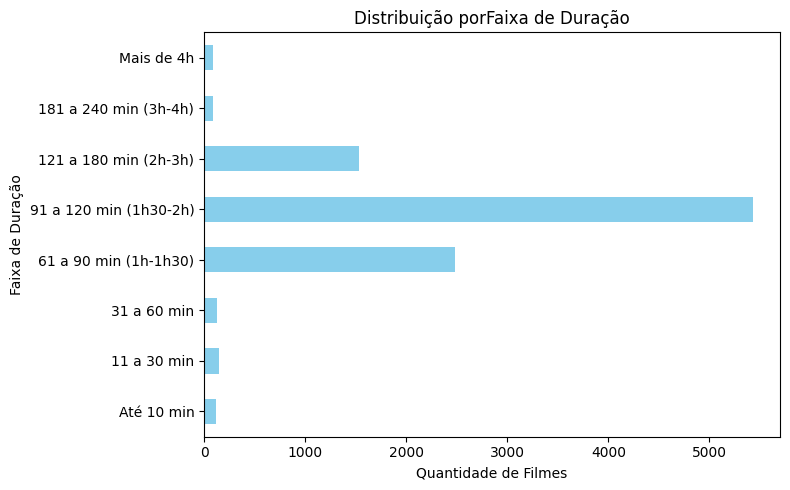

In [190]:
faixa_counts = df['Faixa_duracao'].value_counts().reindex(labels)

plt.figure(figsize=(8, 5))
faixa_counts.plot(kind='barh', color='skyblue')
plt.title('Distribuição porFaixa de Duração')
plt.xlabel('Quantidade de Filmes')
plt.ylabel('Faixa de Duração')
plt.tight_layout()
plt.show()

## Padronização das linguagens (para hipótese 3)

In [191]:
df['Original_language'] = df['Original_language'].astype(str).str.lower().str.strip()
tabela_idiomas = df['Original_language'].value_counts().reset_index()
tabela_idiomas.columns = ['Idioma', 'Quantidade de Filmes']
display(tabela_idiomas)

,Idioma,Quantidade de Filmes
0,english,8074
1,italian,396
2,japanese,308
3,french,291
4,korean,145
5,spanish,115
6,german,96
7,no spoken language,94
8,chinese,66
9,danish,60


Valores compostos ou duplicados padronizados e passando pra Pt-br

In [192]:
mapeamento_idiomas = {
    'english': 'Inglês',
    'italian': 'Italiano',
    'japanese': 'Japonês',
    'french': 'Francês',
    'korean': 'Coreano',
    'spanish': 'Espanhol',
    'german': 'Alemão',
    'chinese': 'Chinês',
    'cantonese': 'Cantonês',
    'portuguese': 'Português',
    'russian': 'Russo',
    'swedish': 'Sueco',
    'polish': 'Polonês',
    'dutch': 'Holandês',
    'romanian': 'Romeno',
    'persian (farsi)': 'Persa',
    'persian': 'Persa',
    'norwegian': 'Norueguês',
    'arabic': 'Árabe',
    'czech': 'Tcheco',
    'greek (modern)': 'Grego',
    'greek': 'Grego',
    'hindi': 'Hindi',
    'hungarian': 'Húngaro',
    'indonesian': 'Indonésio',
    'thai': 'Tailandês',
    'turkish': 'Turco',
    'ukrainian': 'Ucraniano',
    'tagalog': 'Tagalo',
    'georgian': 'Georgiano',
    'hebrew (modern)': 'Hebraico',
    'hebrew': 'Hebraico',
    'estonian': 'Estoniano',
    'icelandic': 'Islandês',
    'nepali': 'Nepalês',
    'serbian': 'Sérvio',
    'serbo-croatian': 'Sérvio-Croata',
    'tamil': 'Tâmil',
    'malayalam': 'Malaiala',
    'telugu': 'Télugo',
    'mayan': 'Maia',
    'lithuanian': 'Lituano',
    'slovak': 'Eslovaco',
    'bambara': 'Bambara',
    'swahili': 'Suaíli',
    'akan': 'Akan',
    'eastern punjabi, eastern panjabi': 'Punjabi',
    'punjabi': 'Punjabi',
    'mongolian': 'Mongol',
    'esperanto': 'Esperanto',
    'kinyarwanda': 'Kinyarwanda',
    'croatian': 'Croata',
    'bengali, bangla': 'Bengali',
    'bengali': 'Bengali',
    'albanian': 'Albanês',
    'somali': 'Somali',
    'lao': 'Laosiano',
    'armenian': 'Armênio',
    'finnish': 'Finlandês',
    'no spoken language': 'Não informado',
    'unknown': 'Não informado',
    'show all': 'Não informado',
    'show all…': 'Não informado'
}

In [193]:
df['Idioma'] = df['Original_language'].astype(str).str.lower().str.strip()
df['Idioma'] = df['Idioma'].replace(mapeamento_idiomas)
tabela_idiomas = df['Idioma'].value_counts().reset_index()
tabela_idiomas.columns = ['Idioma', 'Quantidade de Filmes']
display(tabela_idiomas)

,Idioma,Quantidade de Filmes
0,Inglês,8074
1,Italiano,396
2,Japonês,308
3,Francês,291
4,Coreano,145
5,Espanhol,115
6,Não informado,97
7,Alemão,96
8,Chinês,66
9,danish,60


## Padronização de Estúdios (para hipótese 3)

Fazendo o mesmo que fizemos em gênero

In [194]:
df_studios = df.copy()
df_studios['Studios'] = df_studios['Studios'].astype(str).str.replace(r"[\[\]']", '', regex=True)
df_studios['Studios'] = df_studios['Studios'].str.split(',')
df_studios = df_studios.explode('Studios')
df_studios['Studios'] = df_studios['Studios'].str.strip().str.lower()

In [195]:
# terei estúdios o 'unknown' do top 10 estudios pq ele aparecia em 7º
df_studios_filtrado = df_studios[df_studios['Studios'].str.lower().str.strip() != 'unknown']
tabela_studios = df_studios_filtrado['Studios'].value_counts().reset_index().head(10)
tabela_studios.columns = ['Estúdio', 'Quantidade de Filmes']
display(tabela_studios)

,Estúdio,Quantidade de Filmes
0,warner bros. pictures,502
1,paramount pictures,423
2,columbia pictures,411
3,universal pictures,410
4,20th century fox,367
5,metro-goldwyn-mayer,317
6,united artists,165
7,new line cinema,146
8,walt disney pictures,116
9,lionsgate,93


## Tratamento de Valores Nulos

O dataset Letterbox original não possui valores nulos.

In [196]:
# Verificar a presença de valores nulos no dataset original
print("Valores nulos no dataset Iris:")
df.isnull().sum()

Valores nulos no dataset Iris:


,0
Unnamed: 0,0
Film_title,0
Director,0
Average_rating,0
Genres,0
Runtime,0
Original_language,0
Description,0
Studios,0
Watches,0


# Hipótese 1: Filmes do gênero Drama são os que mais engajam os usuários em termos de curtidas.

### Top 5 com mais likes

Agrupando os gênerios, somando o total de likes pra cada gênerio e ordenando pra pegar o top 5, temos os gêneros mais curtidos

In [197]:
top5_generos_curtidos = (df_exploded.groupby('Gênero_padronizado')['Likes'].sum().sort_values(ascending=False).head(5).reset_index())

E então o gráfico para verificarmos:

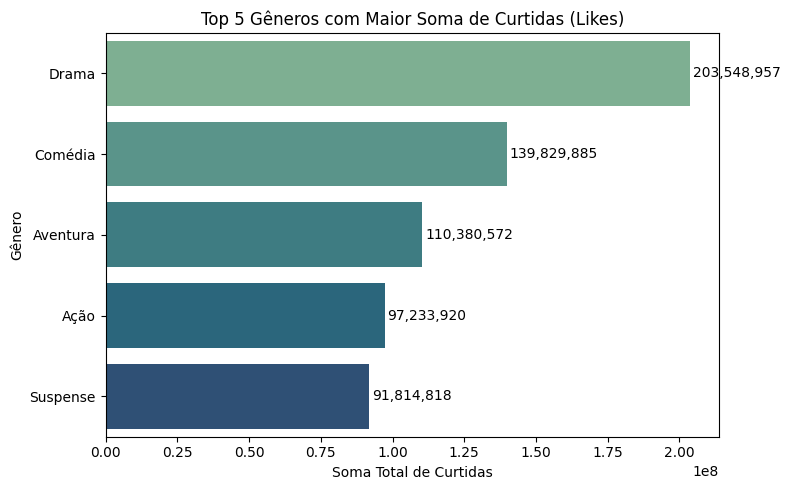

In [198]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Likes', y='Gênero_padronizado', hue='Gênero_padronizado', data=top5_generos_curtidos, palette='crest', dodge=False)
plt.legend([],[], frameon=False)  # Remove a legenda
plt.title('Top 5 Gêneros com Maior Soma de Curtidas (Likes)')
plt.xlabel('Soma Total de Curtidas')
plt.ylabel('Gênero')
for index, row in top5_generos_curtidos.iterrows():
    ax.text(row['Likes'] + 1e6, index, f"{int(row['Likes']):,}", va='center')
plt.tight_layout()
plt.show()

O gráfico de barras mostra que realmente o gênero de Drama é o que mais recebe likes de acordo com nosso dataset, somando mais de 200 milhões de curtidas, seguido de Comédia, Aventida, Ação e Thriller.

Mas isso não significa que ele é o que mais recebe likes já que isso pode estar ligado ao fato de termos mais filmes assisitdos dessa categoria.

### Top 5 mais assistidos

Então, fazendo a soma dos assistidos:

In [199]:
top5_watches_sum = (df_exploded.groupby('Gênero_padronizado')['Watches'].sum().sort_values(ascending=False).head(5).reset_index())

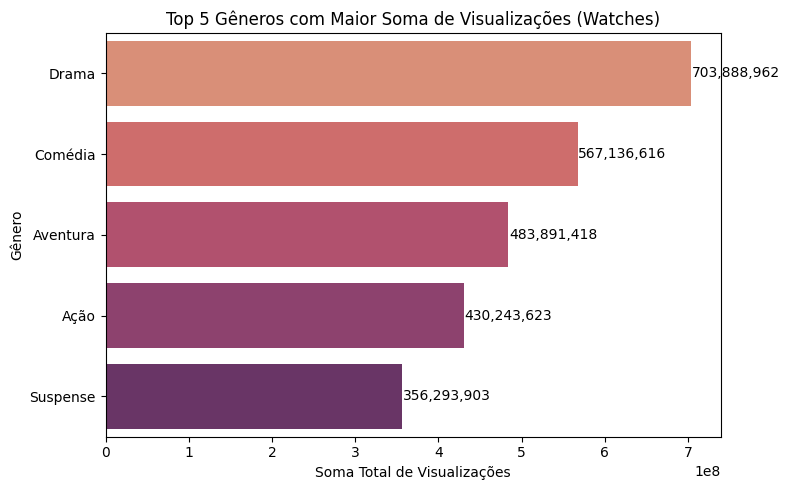

In [200]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Watches', y='Gênero_padronizado', hue='Gênero_padronizado', data=top5_watches_sum, palette='flare', dodge=False)
plt.legend([], [], frameon=False)
plt.title('Top 5 Gêneros com Maior Soma de Visualizações (Watches)')
plt.xlabel('Soma Total de Visualizações')
plt.ylabel('Gênero')
for index, row in top5_watches_sum.iterrows():
    ax.text(row['Watches'] + 1e6, index, f"{int(row['Watches']):,}", va='center')
plt.tight_layout()
plt.show()

Esse gráfico mostra que o Drama realmente aparece no topo em soma total como mais assistidos, o que naturalmente gera mais curtidas.

### Média dos mais curtidos por visualização

Nesse caso, precisamos então verificar quantos likes, em ***média***, um filme de determinado gênero recebe para cada visualização

In [201]:
likes_watches_por_genero = df_exploded.groupby('Gênero_padronizado')[['Likes', 'Watches']].sum().reset_index()
likes_watches_por_genero['likes_per_view'] = (likes_watches_por_genero['Likes'] / likes_watches_por_genero['Watches']) * 100
top_generos_likes_per_view = likes_watches_por_genero.sort_values(by='likes_per_view', ascending=False).head(5)
display(top_generos_likes_per_view)

,Gênero_padronizado,Likes,Watches,likes_per_view
14,Musical,14028916,48386657,28.993357
6,Drama,203548957,703888962,28.917765
4,Crime,68009075,243431948,27.937613
11,Guerra,12490758,45960201,27.177335
13,Mistério,44053752,162209996,27.158469


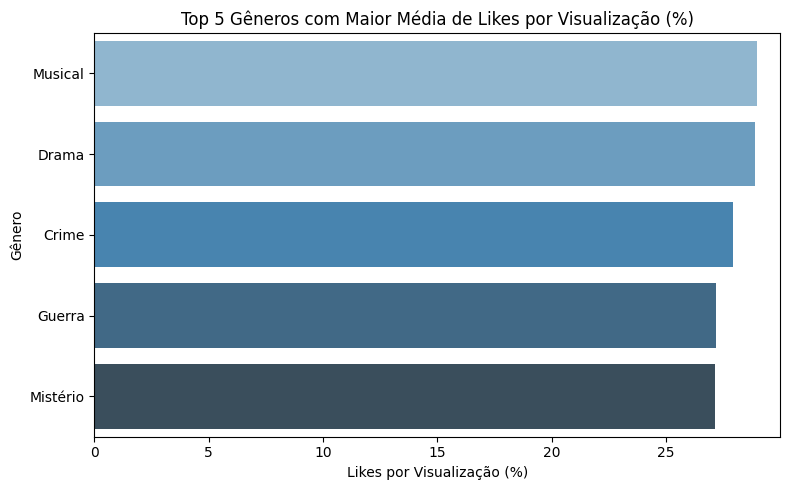

In [202]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=top_generos_likes_per_view, y='Gênero_padronizado', x='likes_per_view', hue='Gênero_padronizado', palette='Blues_d', dodge=False, legend=False)
plt.title('Top 5 Gêneros com Maior Média de Likes por Visualização (%)')
plt.xlabel('Likes por Visualização (%)')
plt.ylabel('Gênero')
plt.xlim(0, top_generos_likes_per_view['likes_per_view'].max() + 1)
plt.tight_layout()
plt.show()

Nesse gráfico final temos a conclusão de que nossa hipótese 1 não é verdadeira, pois apesar do gênero Drama parecer no topo tanto em soma total de curtidas como views, o que aparentemente indicava um alto engajamento, a média de curtidas por visualização, que é um indicador mais justo de engajamento real por público, mostra que na verdade o filme com mais engajamento é o do gênero musical. Portanto, mesmo que drama tenha muito alcance, não necessariamente converte em engajamento proporcional.

# Hipótese 2: Filmes com duração de 1h30 a 2h são melhores rankeados (Highest)

## Distribuição das Avaliações por Faixa de Duração

Pegando o dado de Faixa_duracao que fizemos anteriormente no pré-processamento de dados, podemos agora verificar se os filmes com duração de 1h30 a 2h são melhores rankeados (Highest), ou seja, recebem mais 5 estrelas.

In [203]:
# soma das classificações de avaliacoes (rank) por faixa de tempo
avaliacoes_totais = df.groupby('Faixa_duracao', observed=True)[['Highest★★★★★', 'Medium★★★', 'Lowest★']].sum().reset_index()
avaliacoes_melted = avaliacoes_totais.melt(id_vars='Faixa_duracao', var_name='Tipo de Avaliação',value_name='Soma')

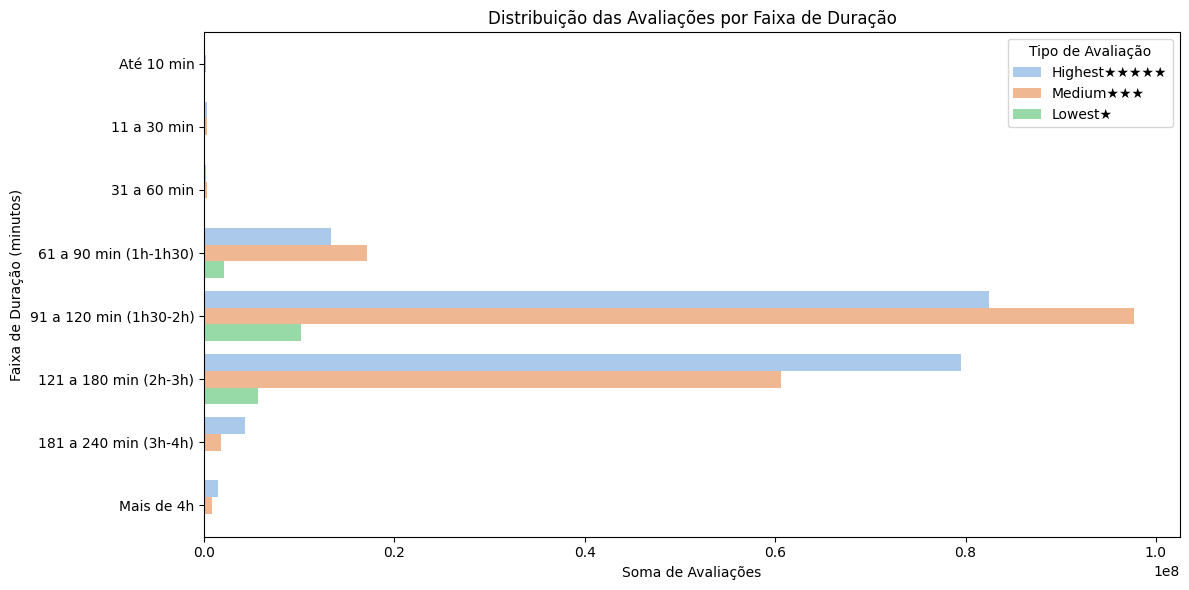

In [204]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=avaliacoes_melted,
    x='Soma',
    y='Faixa_duracao',
    hue='Tipo de Avaliação',
    palette='pastel'
)
plt.title('Distribuição das Avaliações por Faixa de Duração')
plt.xlabel('Soma de Avaliações')
plt.ylabel('Faixa de Duração (minutos)')
plt.legend(title='Tipo de Avaliação')
plt.tight_layout()
plt.show()

## Distribuição Proporcional das Avaliações por Faixa de Duração

In [205]:
# Convertendo para porcentagem (linha = 100%)
avaliacoes_totais = df.groupby('Faixa_duracao', observed=True)[['Highest★★★★★', 'Medium★★★', 'Lowest★']].sum()
avaliacoes_percentual = avaliacoes_totais.div(avaliacoes_totais.sum(axis=1), axis=0) * 100

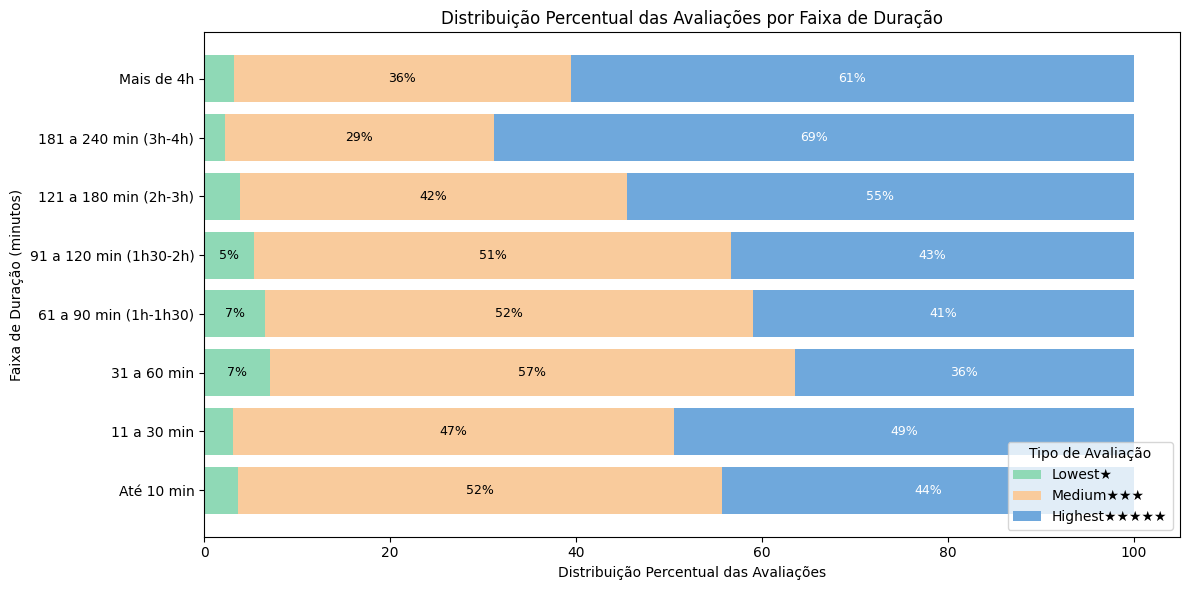

In [206]:
plt.figure(figsize=(12, 6))

cores = {
    'Lowest★': '#8fd9b6',
    'Medium★★★': '#f9cb9c',
    'Highest★★★★★': '#6fa8dc'
}
plt.barh(avaliacoes_percentual.index, avaliacoes_percentual['Lowest★'], color=cores['Lowest★'], label='Lowest★')
plt.barh(avaliacoes_percentual.index, avaliacoes_percentual['Medium★★★'],
         left=avaliacoes_percentual['Lowest★'], color=cores['Medium★★★'], label='Medium★★★')
plt.barh(avaliacoes_percentual.index, avaliacoes_percentual['Highest★★★★★'],
         left=avaliacoes_percentual['Lowest★'] + avaliacoes_percentual['Medium★★★'],
         color=cores['Highest★★★★★'], label='Highest★★★★★')

# Adicionando os textos de porcentagem
for i, faixa in enumerate(avaliacoes_percentual.index):
    low = avaliacoes_percentual.loc[faixa, 'Lowest★']
    med = avaliacoes_percentual.loc[faixa, 'Medium★★★']
    high = avaliacoes_percentual.loc[faixa, 'Highest★★★★★']

    if low > 5:
        plt.text(low / 2, i, f'{low:.0f}%', ha='center', va='center', color='black', fontsize=9)
    if med > 5:
        plt.text(low + med / 2, i, f'{med:.0f}%', ha='center', va='center', color='black', fontsize=9)
    if high > 5:
        plt.text(low + med + high / 2, i, f'{high:.0f}%', ha='center', va='center', color='white', fontsize=9)

plt.xlabel('Distribuição Percentual das Avaliações')
plt.ylabel('Faixa de Duração (minutos)')
plt.title('Distribuição Percentual das Avaliações por Faixa de Duração')
plt.legend(title='Tipo de Avaliação', loc='lower right')
plt.tight_layout()
plt.show()

Avaliando os 2 gráficos acima, vimos que apesar de a faixa de duração entre 1h30 e 2h concentrar a maior quantidade absoluta de avaliações 5 estrelas, o que pode indicar uma preferência geral do público por filmes com esse tempo, a análise proporcional traz uma nova perspectiva e torna a hipotese falsa, já que quando observamos a distribuição percentual das avaliações por faixa de duração, percebemos que filmes mais longos, especialmente os que têm entre 3h e 4h e os com mais de 4h, recebem proporcionalmente mais avaliações máximas. Ou seja, mesmo que esses filmes não acumulem o maior número de notas altas, justamnente por serem menos filmes produzidos com essa duração, ainda assim, eles se destacam pela qualidade percebida entre quem os assiste.

Além disso, outras faixas como 2h a 3h e até mesmo 11 a 30 minutos também apresentam percentuais expressivos de avaliações 5 estrelas, o que sugere que filmes muito curtos ou muito longos podem agradar bastante nichos específicos do público.

Então, embora filmes de 1h30 a 2h sejam muito bem avaliados em volume, sugerindo que são os mais populares entre o público, a análise proporcional revela um perfil mais exigente e engajado entre os espectadores de filmes mais longos.

#Hipótese 3: Filmes que têm a língua inglesa de origem tendem a ter maior engajamento pela popularidade dos grandes estúdios


Pra isso, separei os top 10 esrudios com mais produções de acordo com a nossa lista padronizada, depois o total de filmes proporcionais em ingles

In [207]:
top10_estudios = tabela_studios['Estúdio'].tolist()
df_top_estudios = df_studios_filtrado[df_studios_filtrado['Studios'].isin(top10_estudios)]
proporcao_ingles = df_top_estudios.groupby('Studios').agg(
    total_filmes=('Film_title', 'count'),
    filmes_ingles=('Idioma', lambda x: (x == 'Inglês').sum())
).reset_index()
proporcao_ingles['proporcao_ingles'] = (proporcao_ingles['filmes_ingles'] / proporcao_ingles['total_filmes']) * 100
proporcao_ingles.sort_values('proporcao_ingles', ascending=False, inplace=True)

Visualização:

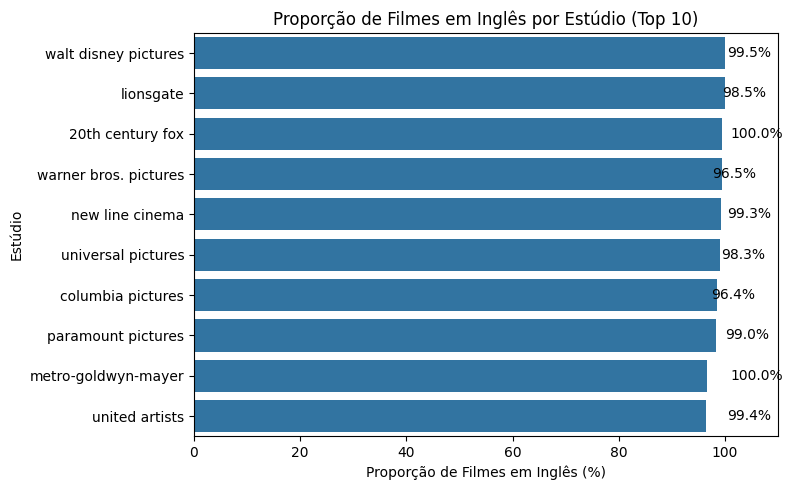

In [208]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=proporcao_ingles, y='Studios', x='proporcao_ingles')
plt.title('Proporção de Filmes em Inglês por Estúdio (Top 10)')
plt.xlabel('Proporção de Filmes em Inglês (%)')
plt.ylabel('Estúdio')
plt.xlim(0, 110)
for i, row in proporcao_ingles.iterrows():
    ax.text(row['proporcao_ingles'] + 1, i, f"{row['proporcao_ingles']:.1f}%", va='center')
plt.tight_layout()
plt.show()

A hipótese de que estúdios grandes com mais produções priorizam filmes de língua inglesa foi confirmada.Obsevando os top 10 estúdios com maior número de filmes no dataset, percebemos que todos eles têm uma proporção altíssima de produções em inglês, muitos acima de 98%, com alguns chegando a 100%.

Isso mostra que os grandes estúdios, como Warner Bros, Paramount Pictures e 20th Century Fox, realmente concentram seus lançamentos em inglês, provavelmente por ser o idioma dominante no mercado cinematográfico global e por atender a uma audiência mais ampla. Assim, além de dominarem em volume de produção, também reforçam o padrão de popularidade do inglês no cinema internacional.

# Conclusão

1. Na primeira hipótese, de que filmes do gênero Drama são os mais engajadores, não foi comprovada, ja que apesar de aparecerem entre os mais vistos e curtidos no total, quando olhamos a média de curtidas por visualização, quem realmente se destaca é o gênero Musical. Ou seja, drama é popular, mas não necessariamente o mais querido proporcionalmente quando estamos falando de likes por vizualização.

2. Na segunda hipótese, sobre filmes com duração entre 1h30 e 2h serem melhor avaliados também se apresentou como falsa. Eles até acumulam muitas notas 5, mas proporcionalmente, os filmes mais longos (com 3h ou mais) ganham mais notas máximas. Isso mostra que, mesmo sendo menos vistos, esses filmes são muito bem avaliados por quem os assiste.

3. Já na terceira hipótese se mostrou verdadeira já os grandes estúdios realmente priorizam filmes em inglês. Estúdios como Warner, Disney e Universal têm mais de 96% de suas produções nesse idioma, o que reforça a ideia de foco no alcance global.